In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

Ver dados brutos

In [2]:
iss = []
Vs = []
nus = np.array([20,50,100,500])
for j in nus:
    data = pd.read_csv(f'CV_{j} mV_Ferri_ferro.txt',sep = ';')
    i = data['WE(1).Current (A)'].values
    iss.append(i)

    V = data['Potential applied (V)'].values
    Vs.append(V)


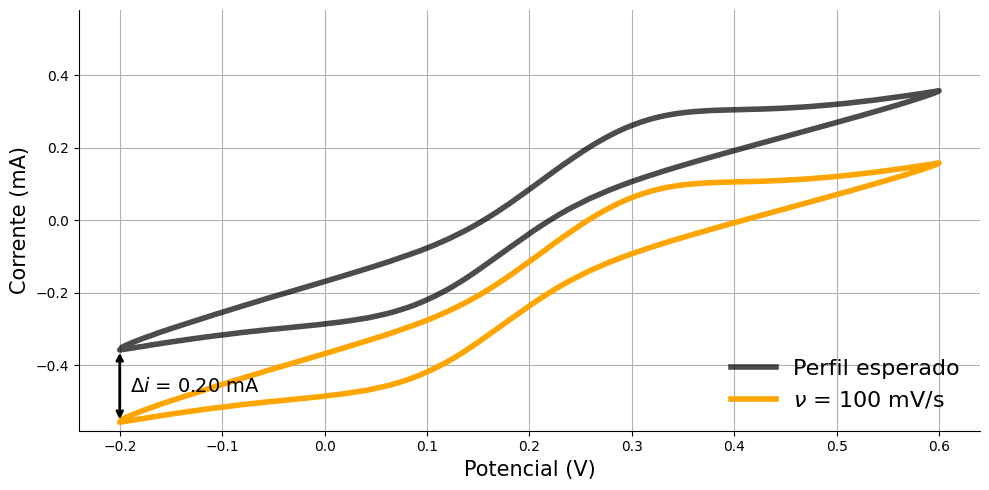

In [3]:
# Plotagem do ajuste polinomial
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))

i_max_ox = []
i_min_red = []

V_min = 0
V_max = 0.4

u = 2
V = np.array(Vs[u])
i = np.array(1000*np.array(iss[u]))

sum_i = max(iss[u]) + abs(min(iss[u]))
is_ = (iss[u] + sum_i/2 - max(iss[u]))

ax1.plot(V,1000*np.array(is_) , lw = 4 , alpha = 0.7, color = 'black' , label = 'Perfil esperado')
ax1.plot(V, i, lw=4,color='orange', label=f'$\\nu$ = {nus[u]} mV/s')

# Encontrando os pontos mínimo de iss e correspondente em is_
i_min_iss = min(1000 * np.array(iss[u]))
i_min_is_ = min(1000 * np.array(is_))

V_min_iss = V[np.argmin(iss[u])]

# Adicionando uma seta de dois lados
ax1.annotate(
    "", 
    xy=(V_min_iss, i_min_iss), 
    xytext=(V_min_iss, i_min_is_),
    arrowprops=dict(arrowstyle="<->", color="black", lw=2)
)

# Adicionando um rótulo para indicar a diferença
ax1.text(V_min_iss + 0.01, (i_min_iss + i_min_is_) / 2, f'$\\Delta i$ = {abs(i_min_iss - i_min_is_):.2f} mA', 
         verticalalignment='center', fontsize=14, color="black")


ax1.set_ylabel('Corrente (mA)',fontsize = 15)
ax1.set_xlabel('Potencial (V)',fontsize = 15)
ax1.set_ylim(-0.58,0.58)
ax1.grid(True)
ax1.legend(loc='lower right', frameon=False,fontsize=16)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')


plt.tight_layout()
plt.savefig('Exp1_VC.png',dpi=300)

Ver dados ideais

In [4]:
iss = []
Vs = []
nus = np.array([20,50,100,500])
for j in nus:
    data = pd.read_csv(f'CV_{j} mV_Ferri_ferro.txt',sep = ';')
    i = data['WE(1).Current (A)'].values
    sum_i = max(i) + abs(min(i))

    iss.append(i + sum_i/2 - max(i))
    V = data['Potential applied (V)'].values
    Vs.append(V)
#nus[-1] = 5000

O que normalmente fariamos seria uasr função para achar pico, porém como o perfil está um pouco diferente do ideal, irei focar no valor de maior corrente na região próxima de onde é o pico

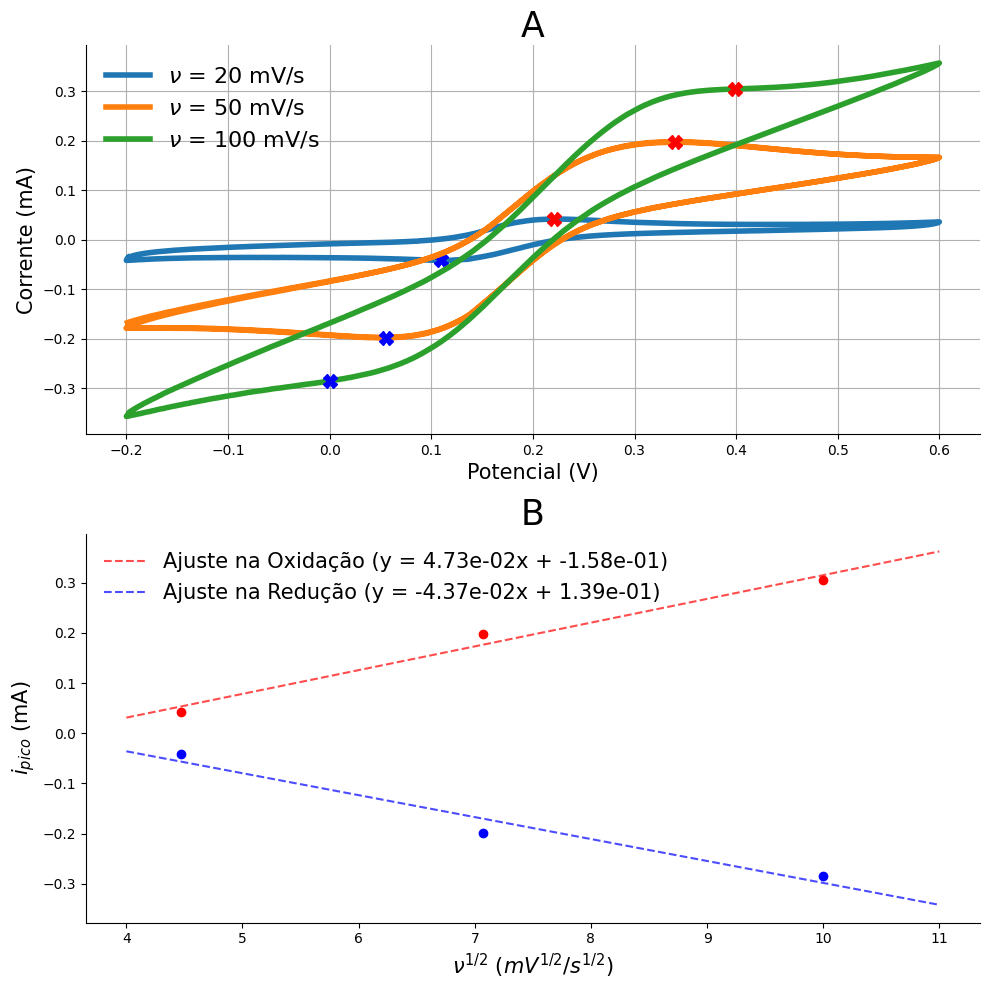

In [5]:
# Plotagem do ajuste polinomial
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

i_max_ox = []
i_min_red = []

V_min = 0
V_max = 0.4

for u in range(len(nus)-1):
    V = np.array(Vs[u])
    i = 1000*np.array(iss[u])
    ax1.plot(V, i, lw=4, label=f'$\\nu$ = {nus[u]} mV/s')

    # Filtrar os dados dentro do intervalo de potencial
    mask = (V >= V_min) & (V <= V_max)
    V_filtered = V[mask]
    i_filtered = i[mask]

    # Encontrar o valor máximo e mínimo de corrente no intervalo
    if len(i_filtered) > 0:
        max_ox = max(i_filtered)  # Máximo de corrente (oxidação)
        min_red = min(i_filtered)  # Mínimo de corrente (redução)
        
        i_max_ox.append(max_ox)
        i_min_red.append(min_red)

        # Plotar os pontos máximos e mínimos
        ax1.plot(V_filtered[np.argmax(i_filtered)], max_ox, 'X', color='red', markersize=10)
        ax1.plot(V_filtered[np.argmin(i_filtered)], min_red, 'X', color='blue', markersize=10)

ax1.set_ylabel('Corrente (mA)',fontsize = 15)
ax1.set_xlabel('Potencial (V)',fontsize = 15)
ax1.grid(True)
ax1.legend(loc='upper left', frameon=False,fontsize=16)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.set_title('A',fontsize=25)


ax2.plot(nus[:-1]**(1/2),i_max_ox, 'o', color='red')
degree = 1  # Grau do polinômio
coeffs1 = np.polyfit(nus[:-1]**(1/2), i_max_ox, degree)
x_range = np.linspace(4,11,100)
y_fit_ox = np.polyval(coeffs1, x_range)
ax2.plot(x_range, y_fit_ox, '--', color='red',alpha = 0.7 ,label=f'Ajuste na Oxidação (y = {coeffs1[0]:.2e}x + {coeffs1[1]:.2e})')

ax2.plot(nus[:-1]**(1/2), i_min_red, 'o',color='blue')
coeffs2 = np.polyfit(nus[:-1]**(1/2), i_min_red, degree)
y_fit_re = np.polyval(coeffs2, x_range)
ax2.plot(x_range, y_fit_re, '--', color='blue',alpha=0.7,label=f'Ajuste na Redução (y = {coeffs2[0]:.2e}x + {coeffs2[1]:.2e})')
ax2.set_ylabel('$i_{pico}$ (mA)',fontsize = 15)
ax2.set_xlabel('$\\nu^{1/2}$ ($mV^{1/2}/s^{1/2}$)',fontsize = 15)
ax2.legend(loc='upper left',frameon=False,fontsize=15)
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.set_title('B',fontsize=25)

plt.tight_layout()
plt.savefig('Randles-Sevic_VC.png',dpi=300)

Calcular área eletroativa

In [6]:
const = 2.69e5
C = 1e-5 # mol/cm^3
D = 7.6e-6 #cm^2/s


coeffs2 = np.polyfit((np.array(nus[:-1])/1000)**(1/2), np.array(i_min_red)/1000, degree)

print(f'Área eletroativa é de {abs(coeffs2[0])/(const * np.sqrt(D)*C)}  cm^2 ')

Área eletroativa é de 0.18649882759806502  cm^2 


#ideai de como pegar pico